In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 200 

In [2]:
df = pd.read_csv('data/df_clean_2.csv')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,university
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,university
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,university
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,university
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,university
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,high school
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,high school
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,university
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,high school


In [4]:
# get the train and test splits
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), 
                                                    df['default payment next month'].values,
                                                    test_size=0.2,random_state=24)

In [5]:
# initialize model
lr = LogisticRegression(C=0.1, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [6]:
# view accuracy score
y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

Is 78% satisfactory? One way to test this is to compare the accuracy with a null model; a hypothetical model that only predicts the majority class for every sample. Since the negative class is the majority class (with 78% of the sample), a null model which always predicts the majority class will be right 78% of the time. Thus our model accuracy is not very useful since we can get a similar accuracy with a model that does not pay attention to the features.

In [7]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

In [8]:
# get predicted probabilities
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [9]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

In [10]:
# pull predicted probabilities for positive and negative samples
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]

Text(0, 0.5, 'Number of samples')

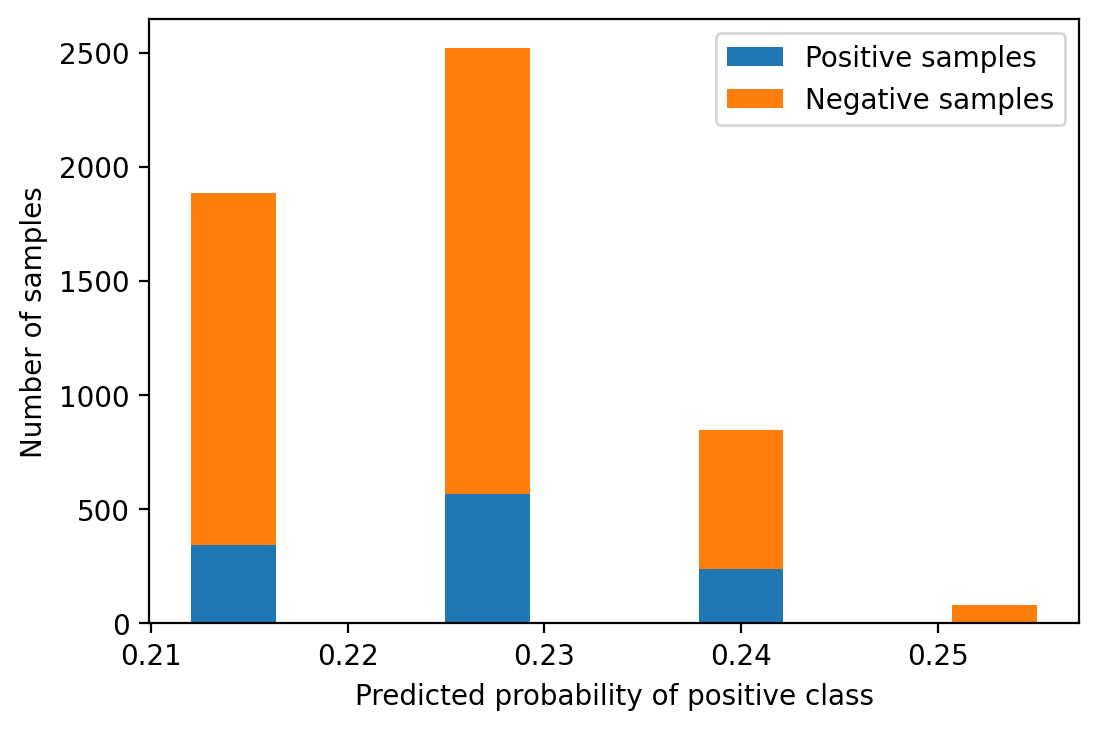

In [11]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Text(0.5, 1.0, 'ROC curve')

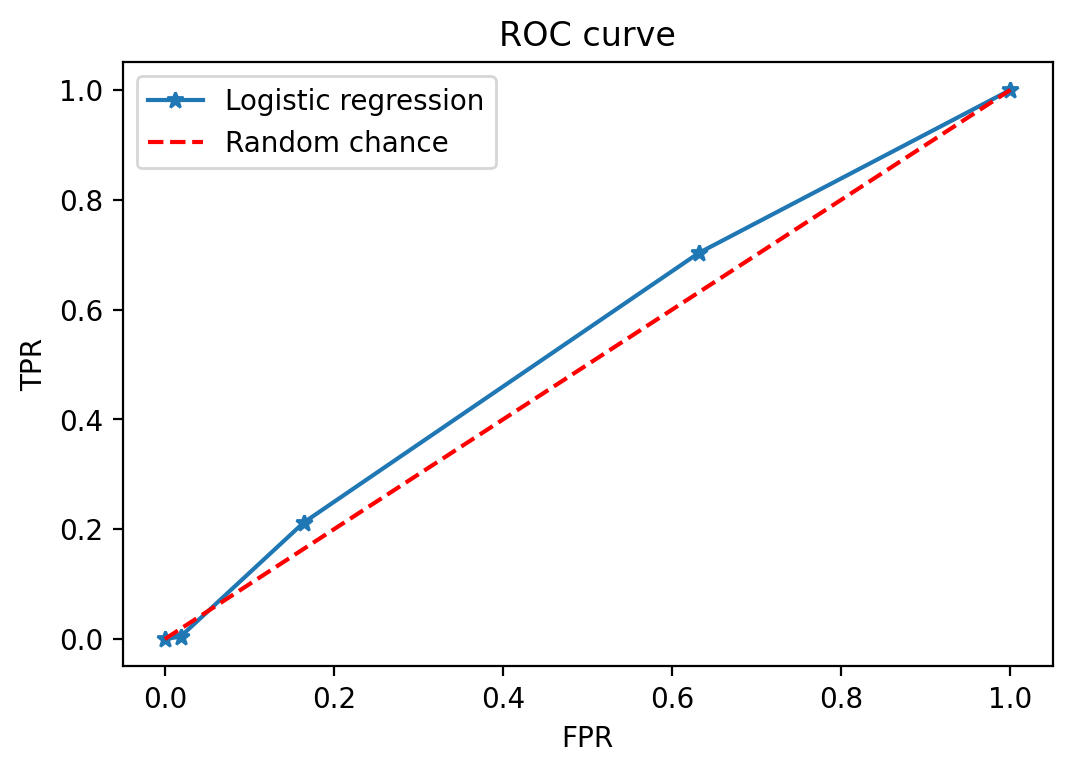

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [13]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [14]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

The ROC AUC for the logistic regression is pretty close to 0.5, meaning it's not a very effective classifier.